**Objective: - Image Classification with CIFAR 100**

This dataset is just like the CIFAR-10, except it has 100 classes containing 600
images each. There are 500 training images and 100 testing images per class.
The 100 classes in the CIFAR-100 are grouped into 20 superclasses. Each image
comes with a &quot;fine&quot; label (the class to which it belongs) and a &quot;coarse&quot; label
(the superclass to which it belongs).

Dataset Link: - https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
The dataset is not direct images. Please decode it using your own techniques.

**Task: - Create a Web Application using Flask. Use the end user should be able
to upload an image and get results with the prediction score.**

To create a web application using Flask for image classification with the CIFAR-100 dataset, follow these steps:

Load and pre-process the CIFAR-100 dataset. This includes decoding the images, splitting into training and testing sets, and possibly transforming or normalizing the data.

Train a deep learning model on the training data. This could be a convolutional neural network (CNN) or another type of image classification model.

Evaluate the model on the test data and save the model weights.

Set up a Flask web server and create the HTML templates for the user interface. This includes the form for uploading an image and displaying the prediction results.

Write the code for the prediction endpoint in Flask that takes an uploaded image, pre-processes it, and feeds it through the saved model to get the prediction scores for each class.

Finally, test the web application to ensure it is working as expected and make any necessary improvements or bug fixes.

In [ ]:
import os
os.chdir('/content/drive/MyDrive/DL_CV_PRACTICAL')

In [ ]:
!wget https://www.cs.toronto.edu/~kriz/cifar-100-python.tar.gz
!tar xzvf cifar-100-python.tar.gz

--2023-02-07 12:16:49--  https://www.cs.toronto.edu/~kriz/cifar-100-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 169001437 (161M) [application/x-gzip]
Saving to: ‘cifar-100-python.tar.gz’

cifar-100-python.ta 100%[===================>] 161.17M  43.3MB/s    in 3.8s    

2023-02-07 12:16:53 (42.4 MB/s) - ‘cifar-100-python.tar.gz’ saved [169001437/169001437]

cifar-100-python/
cifar-100-python/file.txt~
cifar-100-python/train
cifar-100-python/test
cifar-100-python/meta


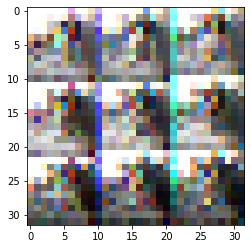

In [ ]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

# Load the CIFAR-100 dataset
def load_data(file):
    with open(file, 'rb') as f:
        data = pickle.load(f, encoding='bytes')
        X = data[b'data']
        y = data[b'fine_labels']
        y = np.array(y)
        X = X.reshape(X.shape[0], 32, 32, 3)
        X = X.astype('float32') / 255
    return X, y

X_train, y_train = load_data('cifar-100-python/train')
X_test, y_test = load_data('cifar-100-python/test')

# Pre-process the labels
num_classes = 100
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Plot a sample image to verify the data has been loaded correctly
plt.imshow(X_train[0])
plt.show()


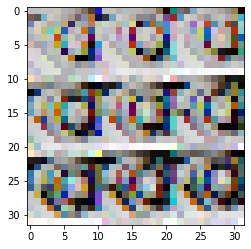

In [ ]:
# Plot a sample image to verify the data has been loaded correctly
plt.imshow(X_train[5])
plt.show()

This code loads the CIFAR-100 dataset using the pickle library, which allows you to load Python objects saved in binary format. The data is then split into training and test sets. The images are reshaped from flat arrays to 3D arrays with dimensions (num_samples, 32, 32, 3) and scaled to values between 0 and 1. Finally, the labels are one-hot encoded to prepare them for use with a neural network.